In [152]:
import numpy as np
import matplotlib.pyplot as plt

In [153]:
# Parameters
num_points = 10000000
mean = 0.35
std_dev = 0.6
clamp_interval = 0.7

# Generate Gaussian signal
signal = np.random.normal(mean, std_dev, num_points)

# Quantize the signal
clamped_signal = np.floor(signal / clamp_interval)

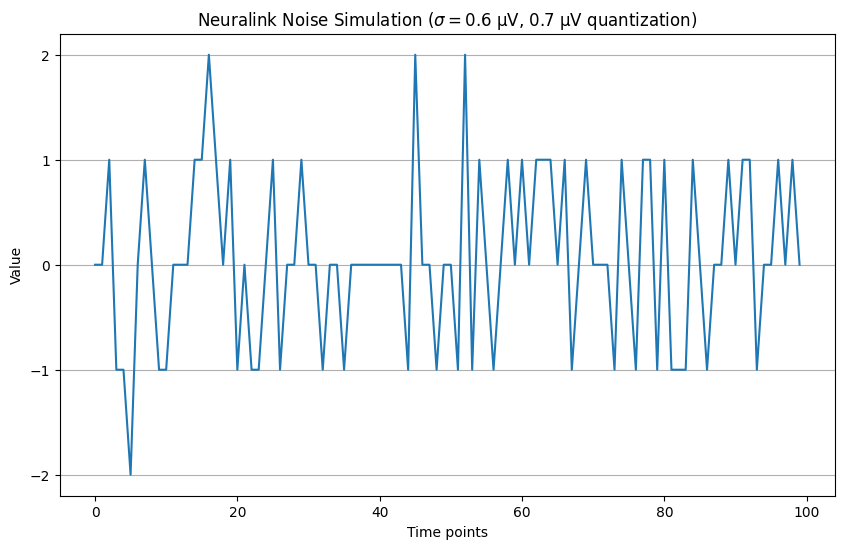

In [154]:
plt.figure(figsize=(10, 6))
plt.plot(clamped_signal[:100])
plt.title(r"Neuralink Noise Simulation ($\sigma=0.6$ µV, 0.7 µV quantization)")
plt.xlabel(r"Time points")
plt.ylabel("Value")
plt.yticks(np.arange(min(clamped_signal[:100]), max(clamped_signal[:100]) + 1, 1))
plt.grid(axis="y")
plt.show()

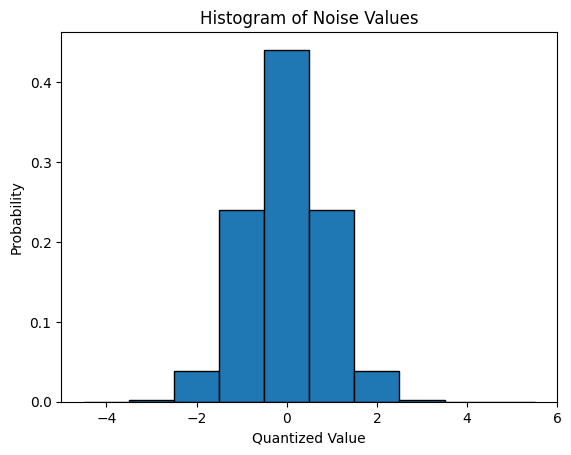

In [155]:
# Plot histogram
plt.hist(
    clamped_signal,
    bins=np.arange(clamped_signal.min(), clamped_signal.max() + 2) - 0.5,
    edgecolor="black",
    density=True,
)
plt.title("Histogram of Noise Values")
plt.xlabel("Quantized Value")
plt.ylabel("Probability")
plt.show()

In [158]:
from scipy.stats import entropy

# Calculate the frequency of each clamped value
values, counts = np.unique(clamped_signal, return_counts=True)

# Calculate the probabilities
probabilities = counts / num_points

# Calculate the entropy
signal_entropy = entropy(probabilities, base=2)

print(f"Signal entropy: {signal_entropy}")

Signal entropy: 1.9017817510722563


In [159]:
print(f"Compression ratio: {10 / signal_entropy}")

Compression ratio: 5.258226920287689
